In [1]:
import py21cmfast as p21c
from py21cmfast import plotting
import os
import matplotlib.pyplot as plt
from py21cmfast import cache_tools
import numpy as np
import cv2

/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_cfg.py:57: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_cfg.py:41: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/inputs.py:491: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remov

(<Figure size 524x475 with 2 Axes>,
 <Axes: xlabel='Redshift', ylabel='y-axis [Mpc]'>)

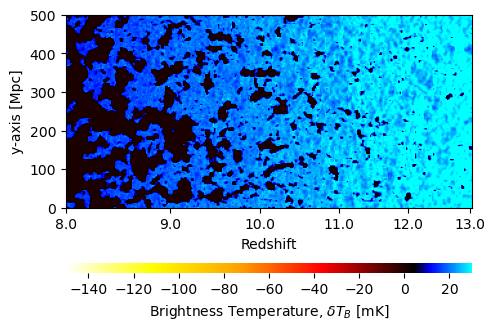

In [2]:
box_len = 500#2000

lightcone = p21c.run_lightcone(
    redshift = 8.0, #6.0
    max_redshift = 13.0, #15.0
    astro_params = p21c.AstroParams({"HII_EFF_FACTOR":60.0}),
    user_params = {"HII_DIM":150, "BOX_LEN": box_len},
    lightcone_quantities=("brightness_temp", 'density'),
    global_quantities=("brightness_temp", 'density', 'xH_box'),
    direc='_cache'
)

plotting.lightcone_sliceplot(lightcone)

In [3]:
shp = getattr(lightcone, 'lightcone_dimensions')
shp

(500, 500, 1053.3333333333335)

In [4]:
import ObserverLightcone

sim_lc_obj = ObserverLightcone.Lightcone_21cmFAST(lightcone)

obs_lc_obj = sim_lc_obj.convert_to_obs_space()

100%|██████████| 314/314 [09:49<00:00,  1.88s/it]


In [5]:
len(obs_lc_obj)

3

In [6]:
np.shape(obs_lc_obj[0])

(150, 150, 316)

In [7]:
np.shape(obs_lc_obj[1])

(316,)

In [8]:
obs_lc_obj[-1]

500

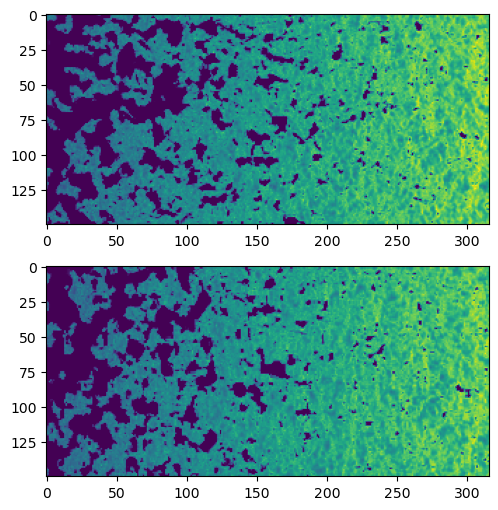

In [9]:
lightcone_simulation = getattr(lightcone, 'brightness_temp')

plt.figure(figsize=(6,6))
plt.subplot(211)
plt.imshow(lightcone_simulation[0,:,:])
plt.subplot(212)
plt.imshow(obs_lc_obj[0][0,:,:])
plt.show()

In [11]:
import astropy.io.fits as fits

hdu = fits.PrimaryHDU(obs_lc_obj[0])
hdul = fits.HDUList([hdu])
hdul.writeto('./foregrounds/FastICA_Data/observer_lightcone.fits',overwrite=True)